In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
#import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

#from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<Figure size 720x540 with 0 Axes>

**Banking behavioral scorecard for Internal Liability customers**


Max. Marks: 100
Problem Statement
Use case A:

Your task is to build a banking behavioral scorecard model for internal customers through a user's liability account and predict the credit risk. These are low transacting customers. The definition that is used for the target variable is every 30+ or X+ days delinquent twice in forward  months.

The implementations of the model are as follows:

Pre-approving customers for cross-selling other products of a bank
Decide the mode of treatment of customers and specify it as an input for credit underwriting
Note: You can decide the customer treatment through a graded risk profile of customers.
What is a Banking behavioral scorecard?

Banking behavioral scorecard is a model that is maintained for a customer based on his liability transactions. Liability transactions are transactions that are transacted by an internal customer of a bank. Internal customers of a bank are the customers who have a savings account (SA) with the bank. 

How can a customer repay a loan?

Customer pays the loan in equal monthly installments (EMIs). Loans get paid through post-dated cheques. Customer also has an option to pay through the Electronic Clearing System (ECS) technique or standing instructions to debit the user's HDFC Bank account with the EMI amount.

What is the meaning of customer risk profile?

Customer risk profile means the probability of the customer defaulting on his EMI payment.

Use Case B: 

Describe your approach that you have used to build the model and your reasons for the same
Describe model segmentation (if any)
Describe how can your model help banks
Data description
Total number of variables: 
Col1 Variable: ID 
Col2 Variable: Target Variable
 to  are anonymized features
The dataset consists of the following types of files:​​

Train.csv: 
Test.csv:  
Sample_submission.csv: Sample format of expected predictions in the .csv format
The sources of the data that are used for the model are as follows:

Banking information of the customer.
Customer savings account or Current Account transaction information for a certain period
Create additional variables or use any additional alternate sources of information for building the model
Submission format
Use Case A: Submit the submissions in a .csv format according to the format that is described in the Sample submission file. 

Col1,Col2
RIGD58ZWD,0
RIH660YDS,1
RIH660Q96,0
RIYDO15W1,1
Use Case B: Store the report in a .ppt, .doc, or Excel file with the source code that must be in a .zip folder. Upload the zip folder in the upload source code section.

Note: The candidate must submit solutions for both the use cases. 

In [2]:
# Load the train data
train = pd.read_csv('C:/Datascience/HDFC/DataSet/train.csv')


C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Load the Test data
test = pd.read_csv('C:/Datascience/HDFC/DataSet/test.csv')


C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [5]:
test.head(5)

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [6]:
#Inserting column Col2 with  -1 value to identify it as Test
test.insert(1, "Col2", -1) 

In [7]:
test.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,-1,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,-1,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,-1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,-1,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [8]:
#Merging Train and Test data sets to process both together 

train_test = pd.concat([train,test], axis=0)

In [9]:
train_test.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


**Data Exploration**

In [10]:
#pandas_profiling.ProfileReport(train_test)

In [11]:
 #Seperating Numerical and Categorical variables
numeric_var_names=[key for key in dict(train_test.dtypes) if dict(train_test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train_test.dtypes) if dict(train_test.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20', 'Col21', 'Col22', 'Col23', 'Col24', 'Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30', 'Col31', 'Col32', 'Col33', 'Col34', 'Col35', 'Col36', 'Col37', 'Col38', 'Col39', 'Col40', 'Col41', 'Col42', 'Col43', 'Col44', 'Col45', 'Col46', 'Col47', 'Col48', 'Col49', 'Col50', 'Col51', 'Col52', 'Col53', 'Col54', 'Col55', 'Col56', 'Col57', 'Col58', 'Col59', 'Col60', 'Col61', 'Col62', 'Col63', 'Col64', 'Col65', 'Col66', 'Col67', 'Col68', 'Col69', 'Col70', 'Col71', 'Col72', 'Col73', 'Col74', 'Col75', 'Col76', 'Col77', 'Col78', 'Col79', 'Col80', 'Col81', 'Col82', 'Col83', 'Col84', 'Col85', 'Col86', 'Col87', 'Col88', 'Col89', 'Col90', 'Col91', 'Col92', 'Col93', 'Col94', 'Col95', 'Col96', 'Col97', 'Col98', 'Col99', 'Col100', 'Col101', 'Col102', 'Col103', 'Col104', 'Col105', 'Col106', 'Col107', 'Col108', 'Col109', 'Col110', 'Col111', 'Col1

In [12]:
train_test_num=train_test[numeric_var_names]

In [13]:
train_test_cat=train_test[cat_var_names]

In [14]:
train_test_cat.head()

,Col1,Col702,Col733,Col742,Col747,Col754,Col763,Col791,Col813,Col822,Col831,Col836,Col843,Col852
0,RIGHGSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RIMHI5ZGP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RIHOG1SZU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RIHOLMQWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RIHO584ET,NaN,NaN,0.463738,NaN,NaN,0.190703,NaN,NaN,NaN,0.463738,NaN,NaN,0.190703


In [15]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_test_num.apply(lambda x: var_summary(x)).T

In [16]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Col2,37963.0,0.0,-1.868100e+04,-0.492084,-1.000000,0.585424,3.427209e-01,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Col3,37963.0,0.0,1.320021e+09,34771.256624,10099.136670,787354.203372,6.199266e+11,-8.555719e+07,0.000000,0.000000,536.364667,2898.023334,10099.136670,32651.113335,91270.264666,160788.445030,545828.312246,3.861868e+07
Col4,37963.0,0.0,8.410274e+08,22153.869897,7270.392500,688376.491802,4.738622e+11,-8.555719e+07,0.000000,0.000000,476.187143,2122.779445,7270.392500,22643.794750,58731.130664,104663.761970,342923.629144,3.024852e+07
Col5,37963.0,0.0,1.072098e+09,28240.594316,6894.163750,624603.075128,3.901290e+11,-7.011955e+07,0.000000,0.000000,445.184667,1966.404584,6894.163750,22020.831015,58486.286746,107296.661910,384947.149886,6.325956e+07
Col6,37963.0,0.0,1.133289e+09,29852.474292,9362.718333,627166.012903,3.933372e+11,-7.100920e+07,0.000000,0.000000,614.102333,2688.465000,9362.718333,29564.457500,76990.516664,132152.327700,423458.137146,2.766654e+07
Col7,37963.0,0.0,1.012866e+09,26680.334438,10576.734000,688337.236068,4.738082e+11,-8.480658e+07,0.000000,0.000000,93.557000,3006.208333,10576.734000,27198.995830,67401.771666,120175.769750,394996.383652,2.193012e+07
Col8,37963.0,0.0,1.319773e+09,34764.709684,13378.520000,708019.061064,5.012910e+11,-9.016250e+07,0.000000,0.000000,107.485333,3861.516666,13378.520000,34993.971665,87099.184334,149318.916640,483985.416954,2.229041e+07
Col9,37963.0,0.0,1.181263e+09,31116.167584,6120.502324,305459.437677,9.330547e+10,0.000000e+00,0.000000,0.000000,497.020386,1896.570184,6120.502324,19421.684730,51357.408316,90907.198548,328249.731194,3.463760e+07
Col10,37963.0,0.0,1.194256e+09,31458.428935,5843.579657,346542.179119,1.200915e+11,0.000000e+00,0.000000,0.000000,492.255286,1844.172778,5843.579657,18506.083385,49132.909848,89293.706022,319751.127468,3.277868e+07
Col11,37963.0,0.0,1.431832e+09,37716.507224,8871.202340,353732.013377,1.251263e+11,0.000000e+00,0.000000,0.000000,133.412539,3372.538407,8871.202340,24071.351890,61477.137370,109006.227690,387776.882052,4.255362e+07


In [17]:
numsum_4k=num_summary[num_summary['NMISS']>4000]

In [18]:
numsum_4k.index

Index(['Col18', 'Col19', 'Col20', 'Col28', 'Col37', 'Col38', 'Col39', 'Col40',
       'Col41', 'Col94',
       ...
       'Col909', 'Col910', 'Col911', 'Col912', 'Col913', 'Col914', 'Col915',
       'Col920', 'Col925', 'Col930'],
      dtype='object', length=455)

In [19]:
#Dropping the columns with many missing values 
train_test_num_new = train_test_num.drop(columns=numsum_4k.index)

In [20]:
#Handling Outliers -
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_test_num_new=train_test_num_new.apply(lambda x: outlier_capping(x))

In [21]:
#Handling missings - Method1
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

train_test_num_new=train_test_num_new.apply(lambda x: Missing_imputation(x))

In [22]:
train_test_num_new.head(10)

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1.0,10867.110000,8648.345000,15766.179090,28904.661670,5273.655000,23461.531670,12855.971630,28715.088760,9114.586439,...,0.0,1.0,0.0,1.0,214.0,214.0,68.0,22.0,22.0,7.0
1,0.0,258431.243300,217963.272500,186628.682000,186628.682000,215451.895000,192361.516000,172653.764600,166697.388700,201351.808200,...,0.0,0.0,0.0,0.0,41.0,41.0,38.0,12.0,12.0,11.0
2,0.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,1.0,1.0,0.0,243.0,238.0,151.0,21.0,21.0,16.0
3,0.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,0.0,243.0,238.0,151.0,80.0,79.0,49.0
4,0.0,0.000000,0.000000,0.000000,0.000000,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,0.0,243.0,238.0,151.0,80.0,79.0,49.0
5,0.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,0.0,60.0,60.0,57.0,20.0,20.0,18.0
6,0.0,117394.193300,84996.646670,84996.646670,84996.646670,92090.916670,92090.916670,36189.904490,36189.904490,40650.464940,...,0.0,2.0,0.0,2.0,12.0,12.0,4.0,9.0,9.0,4.0
7,0.0,258238.570000,210152.875700,210429.372900,241683.570000,245887.285700,279366.833300,92632.399980,55217.429840,84779.200730,...,0.0,0.0,0.0,0.0,16.0,15.0,9.0,18.0,15.0,5.0
8,0.0,14639.296670,15813.036000,19281.006670,15984.465000,16563.006000,17615.630000,2573.648121,2380.503357,3336.155513,...,2.0,1.0,2.0,1.0,42.0,42.0,21.0,12.0,12.0,6.0
9,0.0,84058.406670,32686.360830,32686.360830,65356.431670,68320.916670,136629.333300,52933.218840,58899.392990,89512.540240,...,0.0,0.0,0.0,0.0,21.0,20.0,13.0,10.0,9.0,4.0


In [23]:
train_test_num_new.corr()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
Col2,1.000000,-0.030473,-0.023554,-0.029446,-0.029128,-0.018056,-0.023719,-0.020871,-0.020895,-0.016469,...,0.056298,0.023661,0.054407,0.027693,0.070810,0.070888,0.069010,0.038921,0.039395,0.035964
Col3,-0.030473,1.000000,0.917081,0.858059,0.949782,0.903704,0.939770,0.849758,0.831613,0.794525,...,-0.087632,-0.075159,-0.085825,-0.070131,-0.064185,-0.065939,-0.060686,0.017381,0.013273,-0.012396
Col4,-0.023554,0.917081,1.000000,0.932347,0.958995,0.963847,0.932172,0.826752,0.821961,0.771007,...,-0.085522,-0.070758,-0.083112,-0.065197,-0.044353,-0.046664,-0.057887,0.039999,0.033639,-0.005316
Col5,-0.029446,0.858059,0.932347,1.000000,0.911232,0.895438,0.880275,0.797336,0.795217,0.742421,...,-0.091000,-0.074415,-0.088318,-0.069394,-0.048795,-0.051505,-0.064906,0.040560,0.033903,-0.005140
Col6,-0.029128,0.949782,0.958995,0.911232,1.000000,0.926650,0.967510,0.880811,0.855856,0.818802,...,-0.086971,-0.070064,-0.083990,-0.063669,-0.044800,-0.047282,-0.065240,0.039532,0.031822,-0.014822
Col7,-0.018056,0.903704,0.963847,0.895438,0.926650,1.000000,0.960582,0.803955,0.798815,0.815769,...,-0.069224,-0.056340,-0.066934,-0.051438,-0.028206,-0.030027,-0.033713,0.035874,0.030127,-0.001118
Col8,-0.023719,0.939770,0.932172,0.880275,0.967510,0.960582,1.000000,0.856856,0.834212,0.858477,...,-0.071779,-0.057077,-0.068826,-0.051325,-0.029267,-0.031137,-0.040635,0.037456,0.031458,-0.006956
Col9,-0.020871,0.849758,0.826752,0.797336,0.880811,0.803955,0.856856,1.000000,0.968146,0.928298,...,-0.084488,-0.069183,-0.081942,-0.062781,-0.021949,-0.024424,-0.042520,0.049849,0.044343,0.008864
Col10,-0.020895,0.831613,0.821961,0.795217,0.855856,0.798815,0.834212,0.968146,1.000000,0.903791,...,-0.085354,-0.069952,-0.082548,-0.063939,-0.020622,-0.022426,-0.034899,0.049642,0.046697,0.018074
Col11,-0.016469,0.794525,0.771007,0.742421,0.818802,0.815769,0.858477,0.928298,0.903791,1.000000,...,-0.069669,-0.055492,-0.066090,-0.049131,0.003942,0.001691,-0.014237,0.067822,0.062641,0.032192


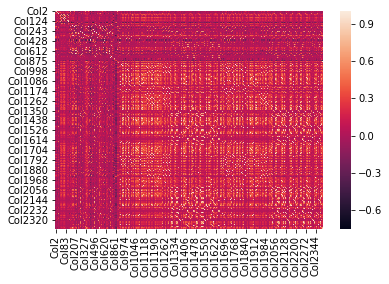

In [24]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train_test_num_new.corr())

In [25]:
# Import clssification regression modules

from sklearn.linear_model import LogisticRegression

In [26]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_test_cat.apply(cat_summary)

In [27]:
cat_summary

,Col1,Col702,Col733,Col742,Col747,Col754,Col763,Col791,Col813,Col822,Col831,Col836,Col843,Col852
N,37963,2943,1487,1593,1256,4413,4520,2946,16,1481,1509,1247,4410,4439
NMISS,0,35020,36476,36370,36707,33550,33443,35017,37947,36482,36454,36716,33553,33524
ColumnsNames,O9EWICXR 2 O106G8SJ 2 O1WBU14E 2 O...,0.0 2922 0 ...,0 435 - ...,-0.349927106 163 - ...,0 443 - ...,0.0 1887 0 ...,0.0 2572 0 ...,0.0 2916 0 ...,"0.0 15 - 1 Name: Col813, dtype: int64",0 427 - ...,-0.349927106 239 - ...,0 438 - ...,0.0 1868 0 ...,0.0 2593 0 ...


In [28]:
train_test_cat.head()

,Col1,Col702,Col733,Col742,Col747,Col754,Col763,Col791,Col813,Col822,Col831,Col836,Col843,Col852
0,RIGHGSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RIMHI5ZGP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RIHOG1SZU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RIHOLMQWU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RIHO584ET,NaN,NaN,0.463738,NaN,NaN,0.190703,NaN,NaN,NaN,0.463738,NaN,NaN,0.190703


In [29]:
# A utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [30]:

#for c_feature in categorical_features

for c_feature in ['Col702', 'Col733', 'Col742', 'Col747', 'Col754', 'Col763', 'Col791', 'Col813', 'Col822', 'Col831', 'Col836', 'Col843', 'Col852']:
    train_test_cat[c_feature] = train_test_cat[c_feature].astype('category')
    train_test_cat = create_dummies(train_test_cat , c_feature )

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
train_test_cat.head()

,Col1,Col702_0.057142859000000004,Col702_0.058166302999999996,Col702_0.069985428,Col702_0.07985957099999999,Col702_0.255550626,Col702_0.44261957799999996,Col702_-,Col702_0,Col733_-0.6890215609999999,...,Col852_0.6187275,Col852_-,Col852_-0.19999999300000001,Col852_0,Col852_0.1,Col852_0.214222192,Col852_0.255548809,Col852_0.326166446,Col852_0.447213596,Col852_6
0,RIGHGSN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RIMHI5ZGP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RIHOG1SZU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RIHOLMQWU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RIHO584ET,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Final file for analysis**

In [32]:
#train_test_new = pd.concat([train_test_num_new, train_test_cat], axis=1)
#High missing values for all variables in train_test_cat except COl1.
#Hence using varaibls from train_test_num_new or final prediction
train_test_new =train_test_num_new

In [33]:
train1 = train_test_new.loc[train_test_new["Col2"]>-1]

In [34]:
test1 = train_test_new.loc[train_test_new["Col2"]==-1]

In [35]:
test1.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,-1.0,81671.396670,86145.420000,75322.961670,75322.961670,112517.400000,100277.833300,20389.152210,30538.533790,83959.112250,...,0.0,0.0,0.0,0.0,44.0,44.0,23.0,41.0,41.0,36.0
1,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,328249.731194,319751.127468,387776.882052,...,1.0,1.0,2.0,2.0,243.0,238.0,151.0,80.0,79.0,49.0
2,-1.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,0.0,33.0,24.0,19.0,3.0,2.0,1.0
3,-1.0,193225.826700,145443.265000,192914.798600,145443.265000,13182.500000,13182.500000,86501.076660,86501.076660,5896.693343,...,0.0,0.0,0.0,0.0,8.0,8.0,3.0,7.0,7.0,3.0
4,-1.0,391338.463300,198733.748300,170343.212900,198733.748300,304653.633300,304653.633300,252830.699400,252830.699400,303444.881900,...,0.0,0.0,0.0,0.0,7.0,7.0,7.0,6.0,6.0,5.0


In [36]:
test1["Col1"]=test["Col1"]

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
test1.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397,Col1
0,-1.0,81671.396670,86145.420000,75322.961670,75322.961670,112517.400000,100277.833300,20389.152210,30538.533790,83959.112250,...,0.0,0.0,0.0,44.0,44.0,23.0,41.0,41.0,36.0,RIGD58ZWD
1,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,328249.731194,319751.127468,387776.882052,...,1.0,2.0,2.0,243.0,238.0,151.0,80.0,79.0,49.0,RIH660YDS
2,-1.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,33.0,24.0,19.0,3.0,2.0,1.0,RIH660Q96
3,-1.0,193225.826700,145443.265000,192914.798600,145443.265000,13182.500000,13182.500000,86501.076660,86501.076660,5896.693343,...,0.0,0.0,0.0,8.0,8.0,3.0,7.0,7.0,3.0,RIYDO15W1
4,-1.0,391338.463300,198733.748300,170343.212900,198733.748300,304653.633300,304653.633300,252830.699400,252830.699400,303444.881900,...,0.0,0.0,0.0,7.0,7.0,7.0,6.0,6.0,5.0,RIYBGC1ZD


In [38]:
#for logistic regression using statsmodels
train_sp, test_sp = train_test_split(train1, test_size=0.25, random_state=0)

In [39]:
#Selecting required columns as feature_columns

feature_columns = train_test_new.columns.difference( ['Col2'] )


In [40]:
feature_columns

Index(['Col10', 'Col1000', 'Col1001', 'Col1002', 'Col1003', 'Col1004',
       'Col1005', 'Col1006', 'Col1007', 'Col1008',
       ...
       'Col990', 'Col991', 'Col992', 'Col993', 'Col994', 'Col995', 'Col996',
       'Col997', 'Col998', 'Col999'],
      dtype='object', length=1925)

In [41]:
train_x =train_sp[feature_columns]
train_y=train_sp['Col2']

In [42]:
train_y.head()

7086     0.0
1120     0.0
11864    0.0
2311     0.0
15465    0.0
Name: Col2, dtype: float64

In [43]:
test_x =test_sp[feature_columns]
test_y=test_sp['Col2']

In [44]:
test_x.head()

,Col10,Col1000,Col1001,Col1002,Col1003,Col1004,Col1005,Col1006,Col1007,Col1008,...,Col990,Col991,Col992,Col993,Col994,Col995,Col996,Col997,Col998,Col999
7214,56538.938200,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
9754,16538.756080,1.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
11132,1907.937039,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0
8630,5564.631894,2.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
7707,6009.163561,2.0,3.0,2.0,3.0,0.0,0.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,3.0,2.0


In [45]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
logreg.predict(train_x)   #by default, it use cut-off as 0.5

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Col10', -2.133776344447382e-06),
 ('Col1000', -9.71399476357299e-06),
 ('Col1001', -6.055511073821268e-06),
 ('Col1002', -9.013034429496651e-06),
 ('Col1003', -5.971370570915383e-06),
 ('Col1004', -2.2517646865247282e-06),
 ('Col1005', -1.471854418408102e-06),
 ('Col1006', -8.08750486568669e-06),
 ('Col1007', -5.851309131439617e-06),
 ('Col1008', -7.37420192311086e-06),
 ('Col1009', -4.716568069226906e-06),
 ('Col1010', -2.1660933851108215e-06),
 ('Col1011', -1.3158077387726648e-06),
 ('Col1012', -4.0055164063990675e-08),
 ('Col1013', -8.204771586362132e-09),
 ('Col1014', -7.811219263964773e-06),
 ('Col1015', -5.160392306801287e-06),
 ('Col1016', -8.767445701406852e-07),
 ('Col1017', -7.845633234680587e-07),
 ('Col1018', 0.0),
 ('Col1019', 0.0),
 ('Col1020', -9.915917734354662e-06),
 ('Col1021', -6.866785495598179e-06),
 ('Col1022', -8.681791634294847e-06),
 ('Col1023', -6.087638273156324e-06),
 ('Col1024', -1.0704749491693896e-05),
 ('Col1025', -7.022824516172945e-06),
 ('Col1026',

In [48]:
logreg.intercept_

array([-5.47128005e-06])

**Predicting the train cases**

In [49]:

train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_x ) } )

In [50]:

train_pred = train_pred.reset_index()

In [51]:
#Comparing the predictions with actual test data
train_pred.sample( n = 10 )

,index,actual,predicted
8236,14786,0.0,0.0
1445,572,1.0,0.0
2472,12023,0.0,0.0
556,14634,0.0,0.0
4228,10972,0.0,0.0
10097,764,0.0,0.0
859,3177,0.0,0.0
12944,6177,1.0,0.0
6092,10537,0.0,0.0
12503,12912,0.0,0.0


In [52]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( train_pred.actual,
                            train_pred.predicted, [1,0] )
cm

array([[   21,  1303],
       [   38, 11778]], dtype=int64)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

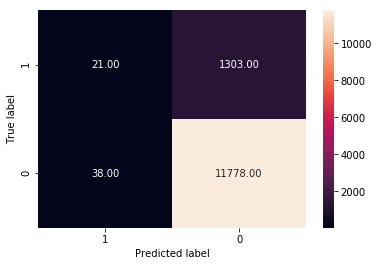

In [54]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [55]:
score = metrics.accuracy_score( train_pred.actual, train_pred.predicted )
round( float(score), 4 )

0.8979

**Predicting the test cases**

In [56]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_x ) } )

In [57]:

test_pred = test_pred.reset_index()

In [58]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

,index,actual,predicted
2348,10235,0.0,0.0
2215,11963,0.0,0.0
1176,13506,1.0,0.0
3470,4142,0.0,0.0
1201,17304,0.0,0.0
3030,10920,0.0,0.0
4034,1150,1.0,0.0
3152,1035,0.0,0.0
322,15976,1.0,0.0
3281,5920,0.0,0.0


In [59]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[   5,  432],
       [  15, 3929]], dtype=int64)

Text(0.5,15,'Predicted label')

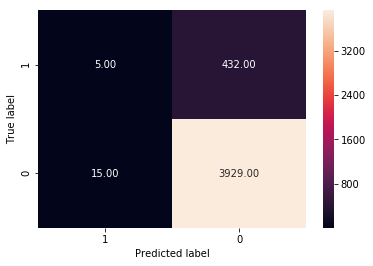

In [60]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [61]:
score = metrics.accuracy_score( test_pred.actual, test_pred.predicted )
round( float(score), 2 )

0.9

Test accuracy is close to  Train accuracy. 

**Predicting the Target out put for Test Data Set**

In [62]:
test_x =test1[feature_columns]

In [63]:
test1["Col2"]=logreg.predict(test_x)

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
test1.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397,Col1
0,1.0,81671.396670,86145.420000,75322.961670,75322.961670,112517.400000,100277.833300,20389.152210,30538.533790,83959.112250,...,0.0,0.0,0.0,44.0,44.0,23.0,41.0,41.0,36.0,RIGD58ZWD
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,328249.731194,319751.127468,387776.882052,...,1.0,2.0,2.0,243.0,238.0,151.0,80.0,79.0,49.0,RIH660YDS
2,0.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,33.0,24.0,19.0,3.0,2.0,1.0,RIH660Q96
3,1.0,193225.826700,145443.265000,192914.798600,145443.265000,13182.500000,13182.500000,86501.076660,86501.076660,5896.693343,...,0.0,0.0,0.0,8.0,8.0,3.0,7.0,7.0,3.0,RIYDO15W1
4,0.0,391338.463300,198733.748300,170343.212900,198733.748300,304653.633300,304653.633300,252830.699400,252830.699400,303444.881900,...,0.0,0.0,0.0,7.0,7.0,7.0,6.0,6.0,5.0,RIYBGC1ZD


In [65]:
test1.shape

(20442, 1927)

In [66]:
test.shape

(20442, 2395)

In [67]:
#test1 = pd.concat([test["Col1"],test1], axis=0)

In [68]:
test1.to_csv('C:/Datascience/HDFC/HDFC_Output.csv', index=False)

In [69]:
test1.head()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397,Col1
0,1.0,81671.396670,86145.420000,75322.961670,75322.961670,112517.400000,100277.833300,20389.152210,30538.533790,83959.112250,...,0.0,0.0,0.0,44.0,44.0,23.0,41.0,41.0,36.0,RIGD58ZWD
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,328249.731194,319751.127468,387776.882052,...,1.0,2.0,2.0,243.0,238.0,151.0,80.0,79.0,49.0,RIH660YDS
2,0.0,545828.312246,342923.629144,384947.149886,423458.137146,394996.383652,483985.416954,328249.731194,319751.127468,387776.882052,...,0.0,0.0,0.0,33.0,24.0,19.0,3.0,2.0,1.0,RIH660Q96
3,1.0,193225.826700,145443.265000,192914.798600,145443.265000,13182.500000,13182.500000,86501.076660,86501.076660,5896.693343,...,0.0,0.0,0.0,8.0,8.0,3.0,7.0,7.0,3.0,RIYDO15W1
4,0.0,391338.463300,198733.748300,170343.212900,198733.748300,304653.633300,304653.633300,252830.699400,252830.699400,303444.881900,...,0.0,0.0,0.0,7.0,7.0,7.0,6.0,6.0,5.0,RIYBGC1ZD


In [70]:
Drop_columns = test1.columns.difference( ['Col1','Col2'] )
Sample_Submission = test1.drop(columns=Drop_columns)

In [71]:
Sample_Submission.head()

,Col2,Col1
0,1.0,RIGD58ZWD
1,0.0,RIH660YDS
2,0.0,RIH660Q96
3,1.0,RIYDO15W1
4,0.0,RIYBGC1ZD


In [72]:
Sample_Submission.to_csv('C:/Datascience/HDFC/Sample_Submission.csv', index=False)

**Variable reduction using Select K-Best technique**

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [74]:
X = train_test_new[feature_columns]
X_new = SelectKBest(f_classif, k=15).fit(X, train_test_new[['Col2']] )

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  19   20   68   69  113  114  161  162  207  208  260  261  280  302
  308  309  740  741  784  785  837  838  886  887  937  938  986  987
 1039 1040 1059 1081 1087 1088 1104 1389 1500 1579 1602 1615 1698 1724
 1737 1899 1900] are constant.
  UserWarning)
C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [75]:
X_new.get_support()

array([False, False, False, ..., False, False, False])

In [76]:
X_new.scores_

array([14.20380137, 42.89275403, 33.43164345, ..., 23.03036801,
       41.75674354, 29.32194267])

In [77]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [78]:
KBest_features

Index(['Col13', 'Col1502', 'Col183', 'Col2052', 'Col2142', 'Col2232', 'Col240',
       'Col243', 'Col380', 'Col437', 'Col440', 'Col577', 'Col627', 'Col633',
       'Col636'],
      dtype='object')

In [79]:
train_x =train_sp[KBest_features]
train_y=train_sp['Col2']
test_x =test_sp[KBest_features]
test_y=test_sp['Col2']
logreg = LogisticRegression()
logreg.fit( train_x, train_y )

logreg.predict(train_x)

train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_x ) } )

train_pred = train_pred.reset_index()




In [80]:
#Comparing the predictions with actual test data
train_pred.sample( n = 10 )

,index,actual,predicted
9784,1214,0.0,0.0
5504,14946,0.0,0.0
6840,12996,0.0,0.0
10681,4768,0.0,0.0
5034,8364,0.0,0.0
9876,10858,0.0,0.0
4202,11229,0.0,0.0
12268,12535,1.0,0.0
1426,6505,0.0,0.0
8522,14003,0.0,0.0


In [81]:
cm = metrics.confusion_matrix( train_pred.actual,
                            train_pred.predicted, [1,0] )
cm

array([[   32,  1292],
       [   19, 11797]], dtype=int64)

Text(0.5,15,'Predicted label')

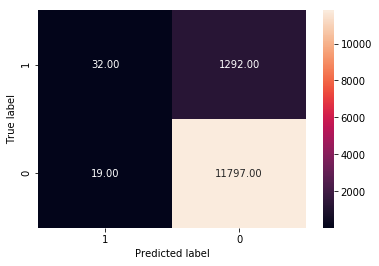

In [82]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [83]:

score = metrics.accuracy_score( train_pred.actual, train_pred.predicted )
round( float(score), 4 )

0.9002

In [84]:


test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_x ) } )

test_pred = test_pred.reset_index()



In [85]:

#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

,index,actual,predicted
3907,2602,1.0,0.0
3754,1021,0.0,0.0
2296,11931,0.0,0.0
293,663,0.0,0.0
4347,3545,0.0,0.0
3726,9806,0.0,0.0
1476,7567,1.0,0.0
3569,8172,0.0,0.0
486,10874,1.0,0.0
81,12167,0.0,0.0


In [86]:
cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[   8,  429],
       [  10, 3934]], dtype=int64)

Text(0.5,15,'Predicted label')

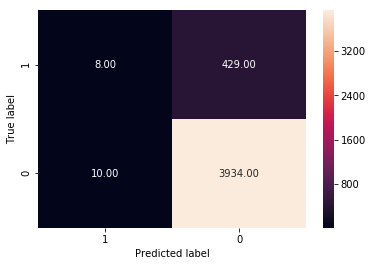

In [87]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [88]:

score = metrics.accuracy_score( test_pred.actual, test_pred.predicted )
round( float(score), 4 )

0.8998

**By Using KBest variables:Predicting the Target out put for Test Data Set**

In [89]:
test_x =test1[KBest_features]

test1["Col2"]=logreg.predict(test_x)

C:\Users\tj13164\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
test1.to_csv('C:/Datascience/HDFC/HDFC_Output_Kbest.csv', index=False)

In [91]:
Drop_columns = test1.columns.difference( ['Col1','Col2'] )
Sample_Submission_Kbest = test1.drop(columns=Drop_columns)

In [92]:
Sample_Submission_Kbest.to_csv('C:/Datascience/HDFC/Sample_Submission_Kbest.csv', index=False)